**Problem Statement:
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-**

**1. Data Collection Phase
I have done web scraping to collect the data of used cars from the well known website www.cars24.com where I found more features of cars compared to other websites and I fetch data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.**

**2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:**

1.Data Cleaning

2.Exploratory Data Analysis

3.Data Pre-processing

4.Model Building

5.Model Evaluation

6.Selecting the best model

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data=pd.read_excel('CAR_PRICE_PREDICTION.xlsx')

In [3]:
#checking overview of the dataset
data.head()

,Unnamed: 0,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,0,Maruti,['Swift'],2020,Manual,"22,826 km",1st Owner,Petrol,New Delhi,"₹5,22,000"
1,1,KIA,['SELTOS'],2020,Manual,"5,999 km",1st Owner,Petrol,New Delhi,"₹17,22,000"
2,2,Maruti,['Swift'],2020,Manual,"16,691 km",2nd Owner,Petrol,New Delhi,"₹5,30,000"
3,3,KIA,['SELTOS'],2020,Automatic,"9,417 km",1st Owner,Petrol,New Delhi,"₹16,81,000"
4,4,Hyundai,"['Grand', 'i10']",2019,Manual,"19,964 km",1st Owner,Petrol,New Delhi,"₹5,03,000"


In [4]:
#checking shape of the dataset
data.shape

(6034, 10)

**As we can see that there are about 6034 rows and 10 columns in the dataset.**

In [5]:
#checking for columns
data.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Year', 'Transmission', 'Kms_driven',
       'Owners', 'Fuel_type', 'Location', 'Price'],
      dtype='object')

**This are the names of the columns which are present in the dataset.**

In [6]:
#checking for null values
data.isna().sum()

Unnamed: 0        0
Brand             0
Model             0
Year              0
Transmission    553
Kms_driven        0
Owners            0
Fuel_type         0
Location          0
Price             0
dtype: int64

**So we can see that there are about 553 null values present in column transmission.**

In [7]:
#dropping null values
data.dropna(inplace=True)
data.shape

(5481, 10)

In [8]:
#dropping unwanted column
data=data.drop(['Unnamed: 0'],axis=1)
data.head(2)

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,Maruti,['Swift'],2020,Manual,"22,826 km",1st Owner,Petrol,New Delhi,"₹5,22,000"
1,KIA,['SELTOS'],2020,Manual,"5,999 km",1st Owner,Petrol,New Delhi,"₹17,22,000"


**Dropped column Unnamed: 0 as it was just an numerical value which will be irrelevant at the time of prediction.**

In [9]:
#checking data types of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 0 to 6033
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         5481 non-null   object
 1   Model         5481 non-null   object
 2   Year          5481 non-null   int64 
 3   Transmission  5481 non-null   object
 4   Kms_driven    5481 non-null   object
 5   Owners        5481 non-null   object
 6   Fuel_type     5481 non-null   object
 7   Location      5481 non-null   object
 8   Price         5481 non-null   object
dtypes: int64(1), object(8)
memory usage: 428.2+ KB


**We can see that among 9 columns,8 columns have object data type and only one column have integer data type.But we can see that in columns kms driven and in column price continuous data is there. so further checking why it is showing the data as object.**

In [10]:
data.head(2)

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,Maruti,['Swift'],2020,Manual,"22,826 km",1st Owner,Petrol,New Delhi,"₹5,22,000"
1,KIA,['SELTOS'],2020,Manual,"5,999 km",1st Owner,Petrol,New Delhi,"₹17,22,000"


**So we can see that in column kms driven commas are present in between and km is there at last and in column price rupees sign and commas are there. Because of that it was showing the data types as object.**

In [11]:
#replacing sign with empty space
data['Price']=data['Price'].str.replace('₹','')

In [12]:
#replacing commas with empty space
data['Price']=data['Price'].str.replace(',','')

In [13]:
#replacing km with empty space
data['Kms_driven']=data['Kms_driven'].str.replace("km",'')

In [14]:
#replacing commas with empty space
data['Kms_driven']=data['Kms_driven'].str.replace(",",'')

In [15]:
#checking
data.head(2)

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,Maruti,['Swift'],2020,Manual,22826,1st Owner,Petrol,New Delhi,522000
1,KIA,['SELTOS'],2020,Manual,5999,1st Owner,Petrol,New Delhi,1722000


In [16]:
#changing the data type of column kms_driven and price from object ton int
data['Price']=data['Price'].astype(int)
data['Kms_driven']=data['Kms_driven'].astype(int)

In [17]:
#checkinf data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 0 to 6033
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         5481 non-null   object
 1   Model         5481 non-null   object
 2   Year          5481 non-null   int64 
 3   Transmission  5481 non-null   object
 4   Kms_driven    5481 non-null   int32 
 5   Owners        5481 non-null   object
 6   Fuel_type     5481 non-null   object
 7   Location      5481 non-null   object
 8   Price         5481 non-null   int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 385.4+ KB


**So we can see that data types of columns kms_driven and price have been changed.**

In [18]:
#checking
data.head(2)

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,Maruti,['Swift'],2020,Manual,22826,1st Owner,Petrol,New Delhi,522000
1,KIA,['SELTOS'],2020,Manual,5999,1st Owner,Petrol,New Delhi,1722000


**We can see that in column model sqaure brackets and single qoutes are present so replacing them with the empty space.**

In [19]:
#replacing open square bracket with empty space
data['Model']=data['Model'].str.replace('[','')

In [20]:
#replacing close square bracket with empty space
data['Model']=data['Model'].str.replace(']','')

In [21]:
#replacing single qoutes with empty space
data['Model']=data['Model'].str.replace('\'',' ')

In [22]:
#checking
data.head(2)

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,Maruti,Swift,2020,Manual,22826,1st Owner,Petrol,New Delhi,522000
1,KIA,SELTOS,2020,Manual,5999,1st Owner,Petrol,New Delhi,1722000


**So now we can see that sqaure brackets and single qoutes have replaced.**

In [23]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5481 entries, 0 to 6033
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         5481 non-null   object
 1   Model         5481 non-null   object
 2   Year          5481 non-null   int64 
 3   Transmission  5481 non-null   object
 4   Kms_driven    5481 non-null   int32 
 5   Owners        5481 non-null   object
 6   Fuel_type     5481 non-null   object
 7   Location      5481 non-null   object
 8   Price         5481 non-null   int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 385.4+ KB


**So now we can see that there are about 3 integer type data columns and 6 object data type columns.**

In [24]:
#checking for duplicates
data.duplicated().sum()

18

**So we can see that there are about 18 duplicates present in the dataset.**

In [25]:
#removing duplicates
data.drop_duplicates(inplace=True)
data.shape

(5463, 9)

**So we can see that duplicates have been removed from the dataset.**

# UNIQUE VALUES

In [26]:
#checking for unique values
data['Brand'].unique()

array(['Maruti', 'KIA', 'Hyundai', 'Renault', 'Honda', 'Toyota', 'Tata',
       'Datsun', 'Ford', 'Skoda', 'Jeep', 'Mahindra', 'MG', 'Volkswagen',
       'Nissan', 'Audi', 'Mercedes', 'Fiat'], dtype=object)

**This column gives us the information about the brand of the car. There are about 18 different brands in the dataset.**

In [27]:
#checking for unique values
data['Model'].unique()

array([' Swift ', ' SELTOS ', ' Grand ,  i10 ', ' Kwid ',
       ' Swift ,  Dzire ', ' New ,  Wagon-R ', ' Celerio ', ' City ',
       ' Wagon ,  R ,  1.0 ', ' i10 ', ' i20 ', ' Alto ,  K10 ', ' Alto ',
       ' SONET ', ' VENUE ', ' Camry ', ' Kiger ', ' Alto ,  800 ',
       ' NEW ,  I20 ', ' Wagon ,  R ,  Stingray ', ' Safari ',
       ' A ,  Star ', ' Eon ', ' AURA ', ' Go ,  Plus ', ' Redi ,  Go ',
       ' Ecosport ', ' Rapid ', ' URBAN ,  CRUISER ', ' Baleno ',
       ' Elite ,  i20 ', ' Verna ', ' Compass ', ' Thar ', ' Ritz ',
       ' ALTROZ ', ' Tiago ', ' Ciaz ', ' S ,  Cross ', ' Amaze ',
       ' Glanza ', ' YARIS ', ' Innova ,  Crysta ', ' KUV ,  100 ,  NXT ',
       ' Brio ', ' Dzire ', ' NEXON ', ' Harrier ', ' NEW ,  SANTRO ',
       ' Octavia ', ' TRIBER ', ' Jazz ', ' Duster ', ' Figo ,  Aspire ',
       ' Xcent ', ' Ertiga ', ' Corolla ,  Altis ', ' HECTOR ', ' Creta ',
       ' WR-V ', ' XUV500 ', ' IGNIS ', ' S ,  PRESSO ', ' XL6 ',
       ' Celerio ,  X ', ' Ven

**This column gives us the information about the model of the car.There are about 108 different models in the dataset.**

In [28]:
#checking for unique values
data['Year'].unique()

array([2020, 2019, 2016, 2009, 2021, 2022, 2010, 2011, 2014, 2013, 2012,
       2015, 2018, 2017], dtype=int64)

**This column gives us the information about the manufacturing year of the car.**

In [29]:
#checking for unique values
data['Transmission'].unique()

array(['Manual', 'Automatic', 'MAnual'], dtype=object)

**This column gives us the information about the type of gear transmission used in the the car.**

In [30]:
#Since the Manual and MAnual is same so replacing MAnual with Manual
data['Transmission']=data['Transmission'].str.replace('MAnual','Manual')

In [31]:
#checking for unique values
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
#checking for unique values
data['Owners'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

**This column gives us the information about the number of owners who have owned that particular cars.**

In [33]:
#replacing 1st as First, 2nd as Second and 3rd as Third in column Owners
data['Owners']=data['Owners'].str.replace('1st','First')
data['Owners']=data['Owners'].str.replace('2nd','Second')
data['Owners']=data['Owners'].str.replace('3rd','Third')

In [34]:
#checking for unique values
data['Owners'].unique()

array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object)

**So we can see that the values have been replaced.**

In [35]:
#checking for unique values
data['Fuel_type'].unique()

array(['Petrol', 'CNG', 'Diesel', 'Hybrid'], dtype=object)

**This column gives us the information about the the type of fuel used for the car engine.**

In [36]:
#checking for unique values
data['Location'].unique()

array(['New Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Chennai', 'Pune'], dtype=object)

**This column gives us the information about the locations of the car.**

In [37]:
#checking number of unique values present in each columns
data.nunique()

Brand             18
Model            108
Year              14
Transmission       2
Kms_driven      4270
Owners             3
Fuel_type          4
Location           8
Price           1182
dtype: int64

**This are the number of unique values which are there in columns.**

In [38]:
#Appending categorical data columns into cat features
cat_features=[]
for i in data:
    if data[i].dtype=='object':
        cat_features.append(i)
print(cat_features)

['Brand', 'Model', 'Transmission', 'Owners', 'Fuel_type', 'Location']


In [39]:
#Appending continuous data columns into cont features
cont_features=[]
for i in data:
    if data[i].dtype!='object':
        cont_features.append(i)
print(cont_features)

['Year', 'Kms_driven', 'Price']


# PLOTTING DIST PLOT

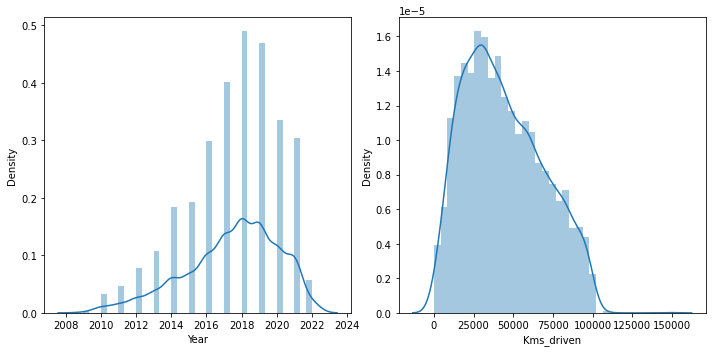

In [40]:
#plotting dist plot
plt.figure(figsize=(10,5))
plotnumber=1
for column in cont_features:
    if plotnumber<=2:
        ax=plt.subplot(1,2,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In the above plots we can see that outliers may be present in both the columns and it can seen that skewness is present in column year.**

# VALUE COUNTS OF CATEGORICAL DATA COLUMNS

In [42]:
#Checking value counts
for i in cat_features:
    if data[i].dtype=='object':
        print(data[i].value_counts())

Maruti        2294
Hyundai       1280
Honda          618
Tata           253
Renault        243
Ford           150
Toyota         133
Mahindra       124
Volkswagen     114
KIA             72
Skoda           54
Datsun          42
Jeep            29
MG              28
Nissan          21
Audi             6
Mercedes         1
Fiat             1
Name: Brand, dtype: int64
 Grand ,  i10           326
 Swift                  301
 Wagon ,  R ,  1.0      296
 Baleno                 262
 City                   260
                       ... 
 Q3                       2
 Q5                       2
 CRV                      2
 Avvventura               1
 Benz ,  E ,  Class       1
Name: Model, Length: 108, dtype: int64
Manual       4499
Automatic     964
Name: Transmission, dtype: int64
First Owner     4241
Second Owner    1181
Third Owner       41
Name: Owners, dtype: int64
Petrol    4074
Diesel     793
CNG        595
Hybrid       1
Name: Fuel_type, dtype: int64
New Delhi    1083
Gurgaon      1082


**In this we can see the value counts of each categorical columns.**

# COUNT PLOTS

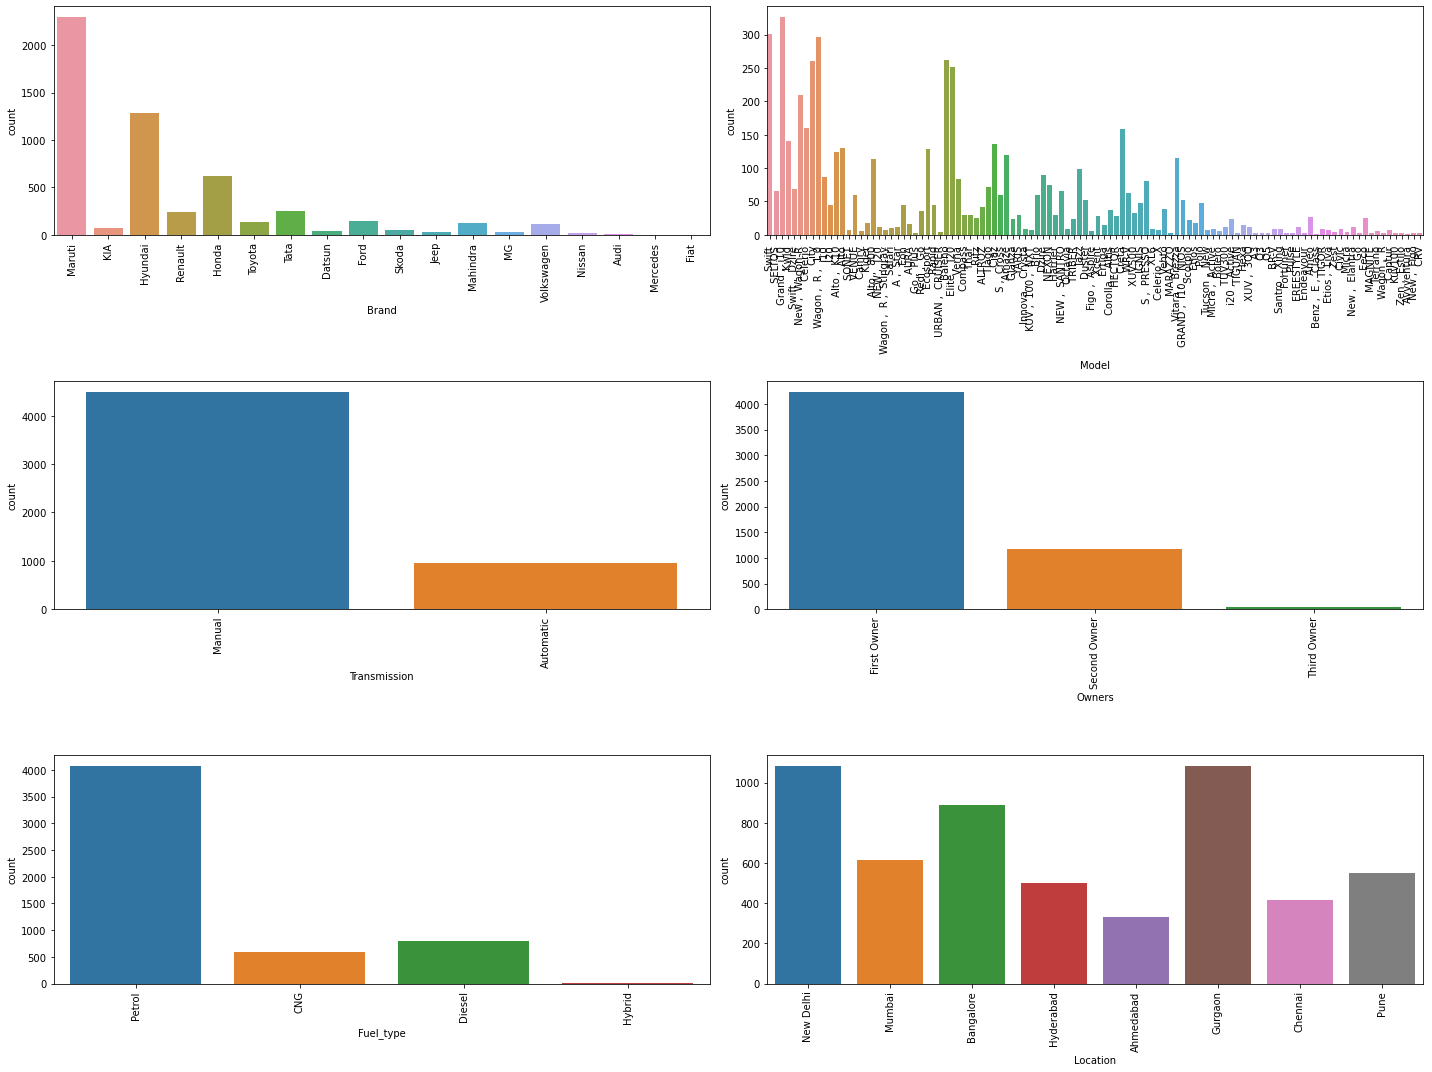

In [43]:
#plotting count plots
plt.figure(figsize=(20,15))
plotnumber=1
for column in cat_features:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(data[column])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Observation**
* **In column Brand, we can see that most of the cars are from brand Maruti.**
* **In column Model, we can see that most of the models of the cars is Grand i 10.**
* **In column transmission, we can see that most of the cars have gear type manual.**
* **In column owners, we can see that most of the cars have single owners.**
* **In column fuel_type, we can see that most of the cars have petrol as fuel type.**
* **In column location, we can see that most of the cars are from location New delhi and Gurgaon.**

# PIE PLOTS

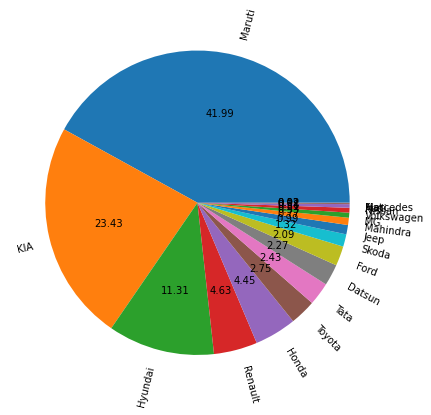

In [435]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=data['Brand'].unique()
plt.pie(x=data['Brand'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**In the above plot we can see clearly see that most of the cars from brand Maruti followed by KIA and Hyundai.**

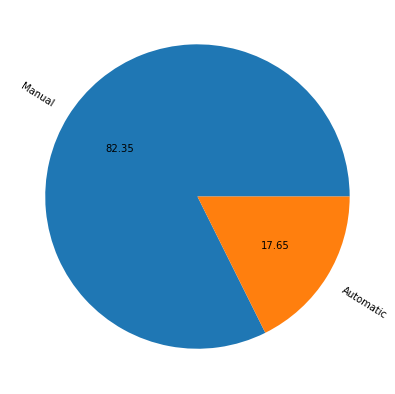

In [436]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=data['Transmission'].unique()
plt.pie(x=data['Transmission'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**In the above plot we can see that most of the cars was having gear type as manual.**

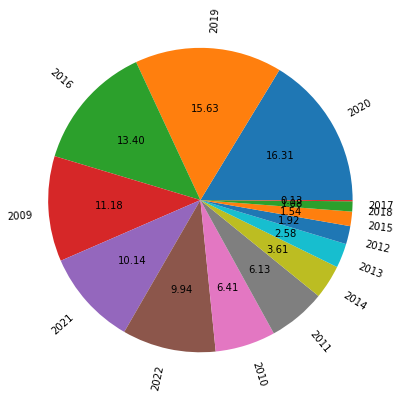

In [437]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=data['Year'].unique()
plt.pie(x=data['Year'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**In the above plot we can see that most of the cars were from year 2020 followed by 2019 and 2016.**

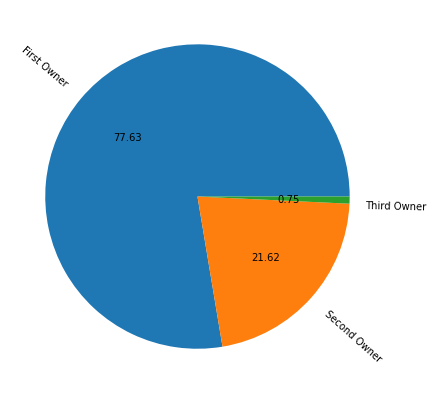

In [439]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=data['Owners'].unique()
plt.pie(x=data['Owners'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**By looking at the plot we can see that most of the cars was owned by single owners.**

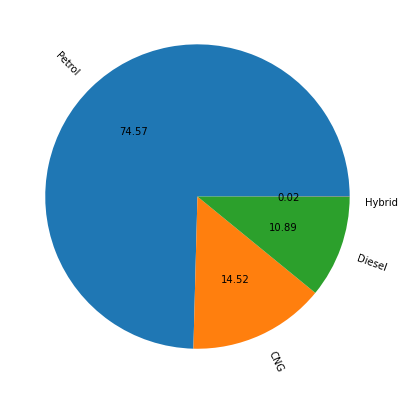

In [438]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=data['Fuel_type'].unique()
plt.pie(x=data['Fuel_type'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**By looking at the above plot we can see that most of the car was having fuel type as petrol followed by CNG and Diesel.**

# LINE PLOTS

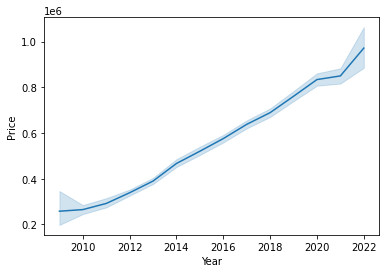

In [440]:
#plotting Line Plot
sns.lineplot(x='Year',y='Price',data=data)
plt.show()

**By looking at the above plots we can clearly see that as the date/year of the car is closed to the present date/year, the price is more, so we can see in the plot that as the years starts coming close to the present year the price of the car starts increasing.**

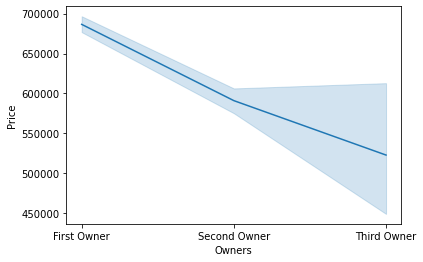

In [41]:
#plotting Line Plot
sns.lineplot(x='Owners',y='Price',data=data)
plt.show()

**In this plot we can see that as the owners starts increasing the price of the car starts decreasing.**

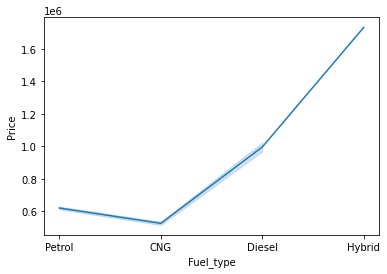

In [443]:
#plotting Line Plot
sns.lineplot(x='Fuel_type',y='Price',data=data)
plt.show()

**In this plot we can see that CNG used fuel car have low price and Hybrid cars have more price compared to petrol and diesel used cars.**

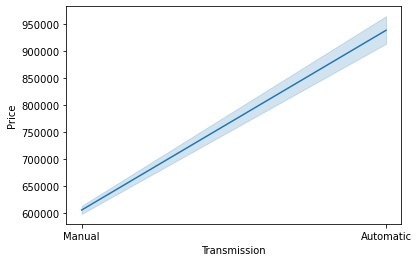

In [444]:
#plotting Line Plot
sns.lineplot(x='Transmission',y='Price',data=data)
plt.show()

**In this plot we can see that the car having automatic gear type have more price than that of manual used gear type.**

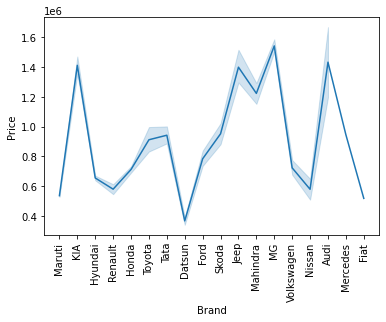

In [446]:
#plotting Line Plot
sns.lineplot(x='Brand',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that the price fluctuates according to the brands, so in this we can see that MG brand have the highest price.**

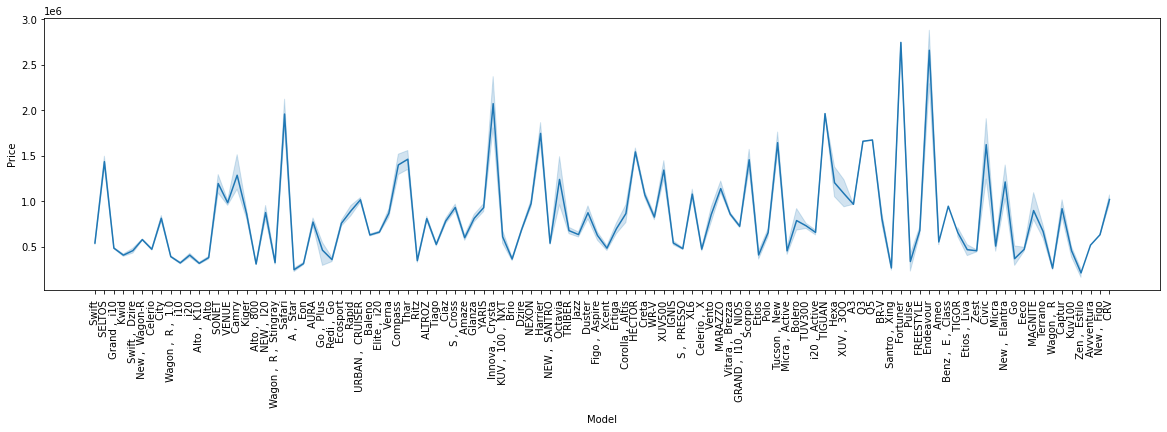

In [448]:
#plotting Line Plot
plt.figure(figsize=(20,5))
sns.lineplot(x='Model',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that Fortuner and Endeavour models have high price than that of other models.**

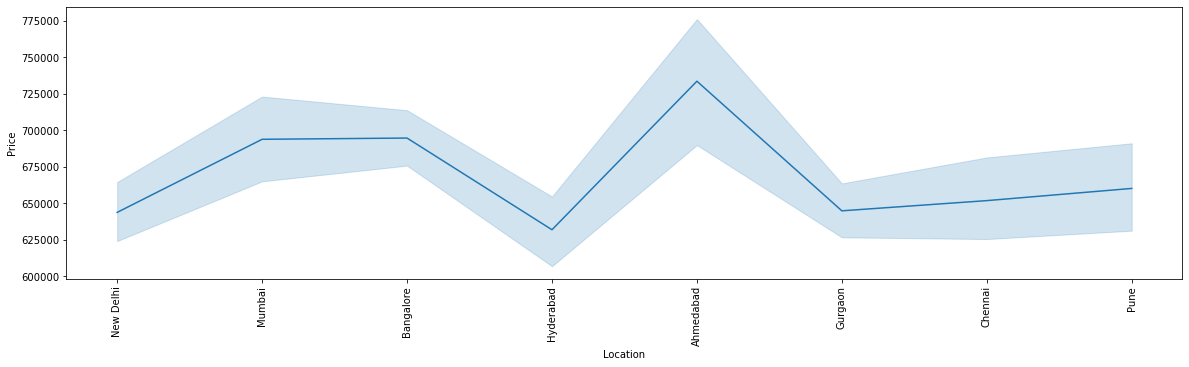

In [449]:
#plotting Line Plot
plt.figure(figsize=(20,5))
sns.lineplot(x='Location',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this plot we can see that cars from location Ahmedabad have high prices as compared to other locations.**

# BAR PLOTS

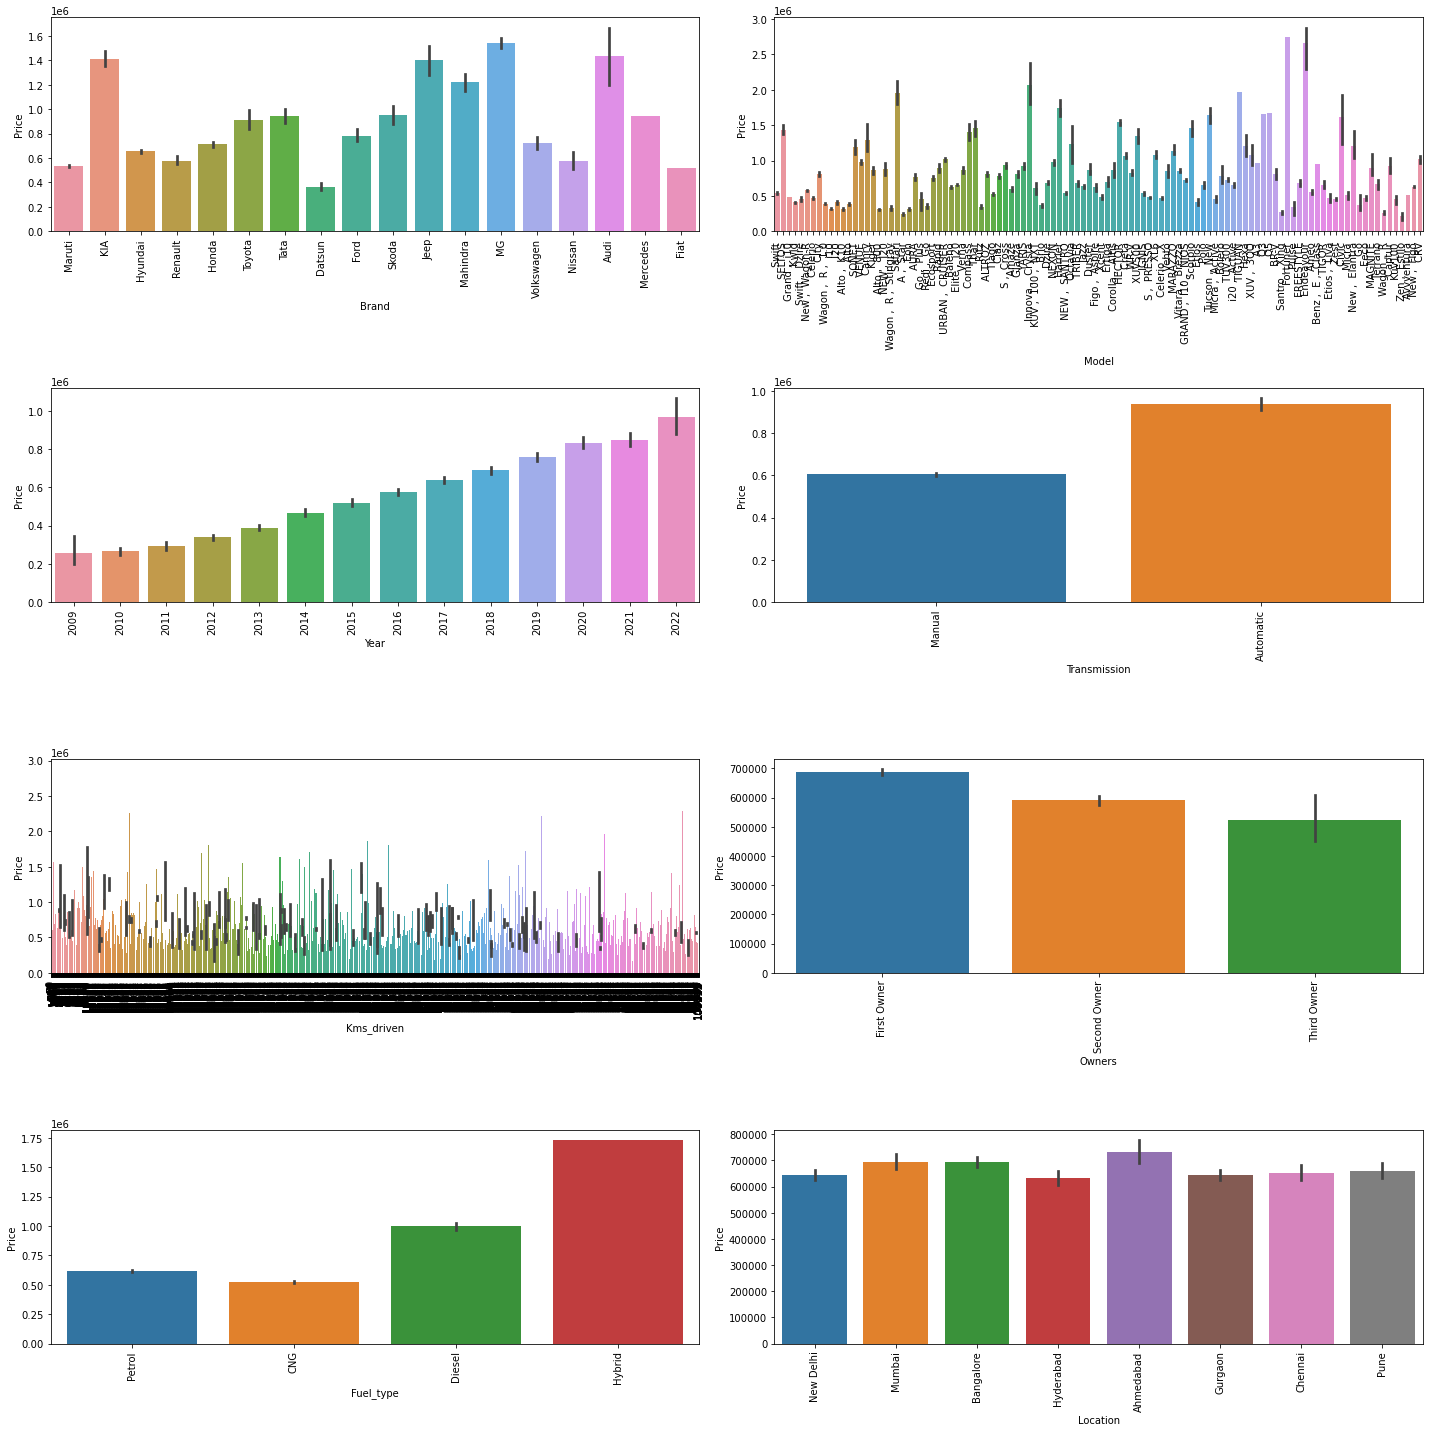

In [44]:
#Plotting bar plots
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.barplot(data[column],y=data['Price'])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Onservation**
* **In the plot brand vs price we can see that the price fluctuates according to the brands, so in this we can see that MG brand have the highest price.** 
* **In the plot model vs price we can see that Fortuner and Endeavour models have high price than that of other models.**
* **By looking at the above plot year vs price we can clearly see that as the date/year of the car is closed to the present date/year, the price is more, so we can see in the plot that as the years starts coming close to the present year the price of the car starts increasing.**
* **In the plot transmission vs price we can see that the car having automatic gear type have more price than that of manual used gear type.**
* **In the plot owners vs price we can see that as the owners starts increasing the price of the car starts decreasing.**
* **In the plot fuel vs price we can see that CNG used fuel car have low price and Hybrid cars have more price compared to petrol and diesel used cars.**
* **In the plot location vs price we can see that cars from location Ahmedabad have high prices as compared to other locations.**

# checking for top 50 highest priced cars

In [40]:
#checking for top 50 highest priced cars
highest_price=data.sort_values(by='Price',ascending=False)[:50]
highest_price

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
1232,Ford,Endeavour,2017,Automatic,39662,First Owner,Diesel,Mumbai,2880000
1186,Ford,Endeavour,2018,Automatic,76544,First Owner,Diesel,Mumbai,2809000
1122,Toyota,Fortuner,2018,Automatic,86567,First Owner,Diesel,New Delhi,2746000
4892,Toyota,Fortuner,2018,Automatic,86567,First Owner,Diesel,Gurgaon,2746000
3818,Toyota,"Innova , Crysta",2021,Automatic,6205,First Owner,Diesel,Gurgaon,2730000
196,Toyota,"Innova , Crysta",2021,Automatic,6205,First Owner,Diesel,New Delhi,2730000
5734,Tata,Safari,2022,Automatic,6906,First Owner,Diesel,Pune,2487000
2306,Tata,Harrier,2022,Automatic,9915,First Owner,Diesel,Bangalore,2335000
3425,Ford,Endeavour,2019,Manual,94389,First Owner,Diesel,Ahmedabad,2291000
5973,Tata,Harrier,2021,Automatic,15213,First Owner,Diesel,Pune,2263000


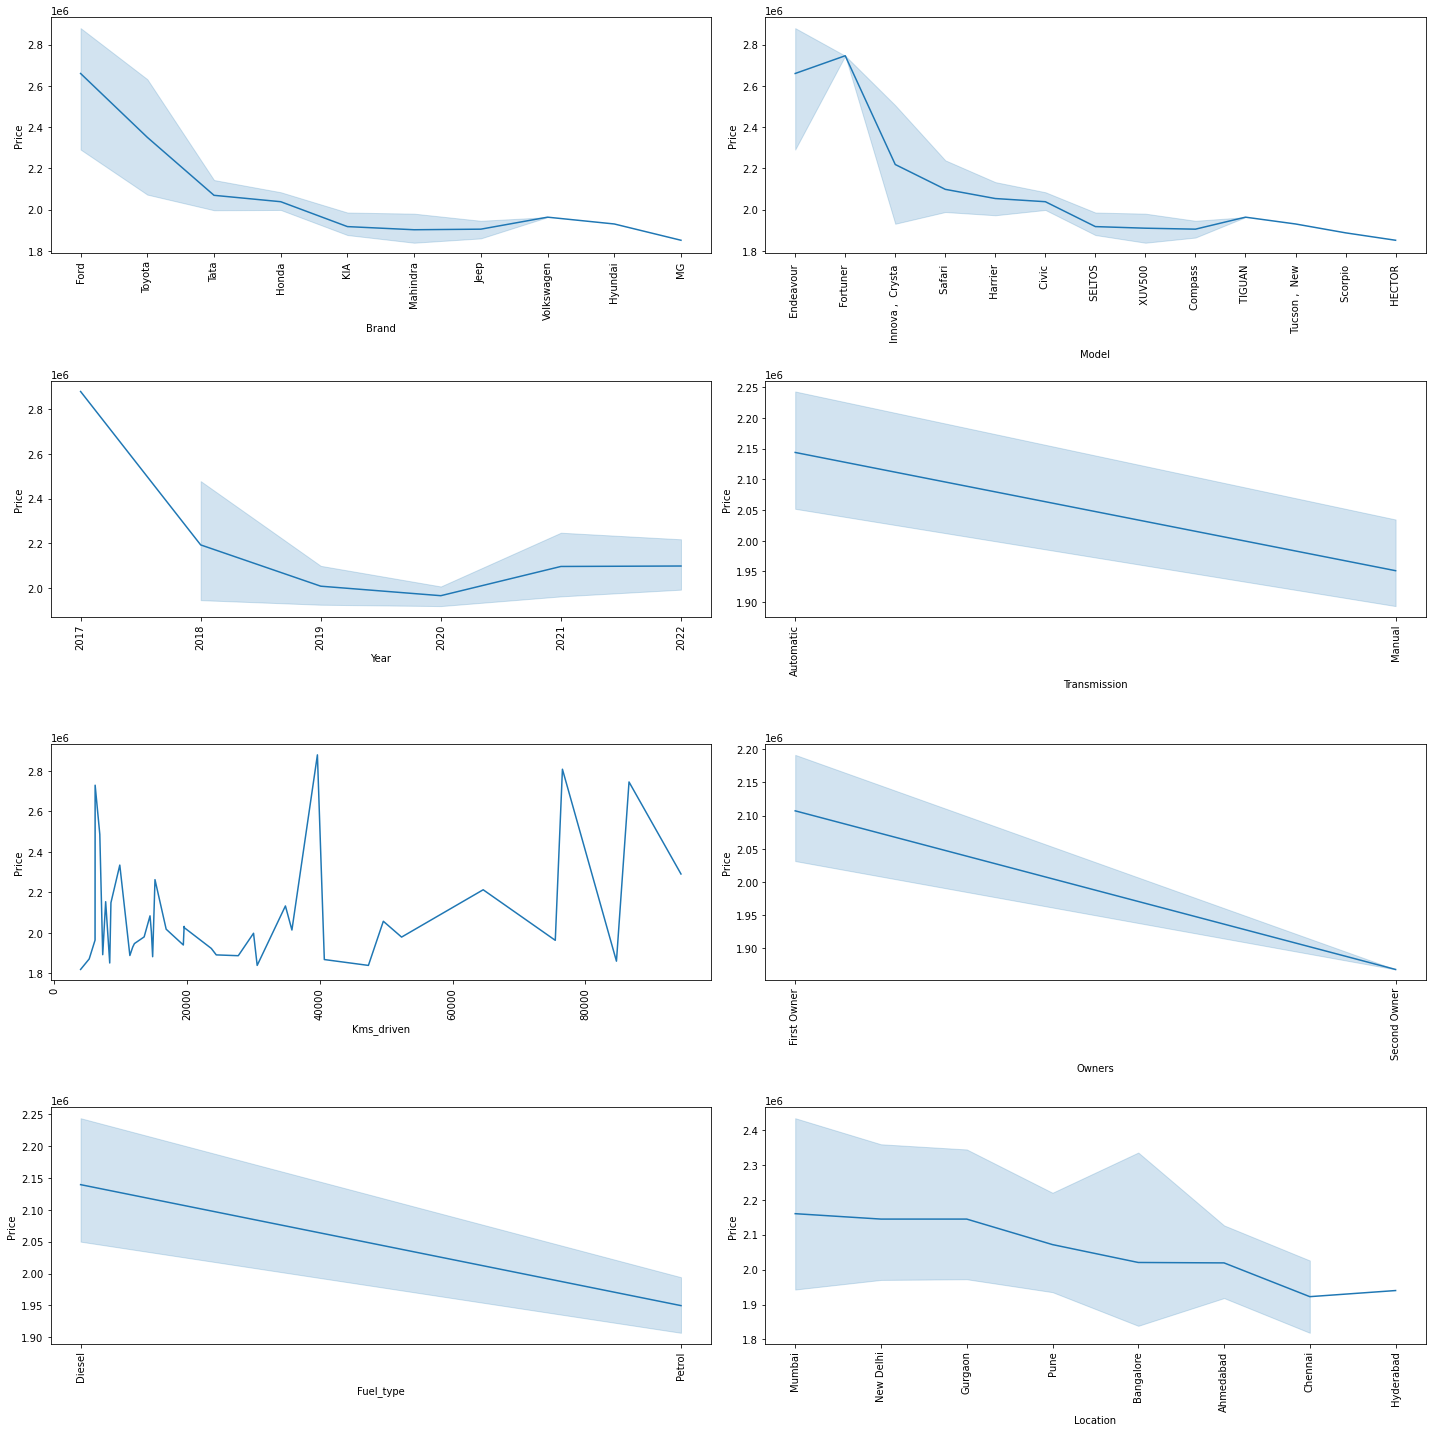

In [41]:
#Plotting bar plots
plt.figure(figsize=(20,20))
plotnumber=1
for column in highest_price:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.lineplot(highest_price[column],y=highest_price['Price'])
        plt.xticks(rotation='vertical')
    plotnumber+=1
plt.tight_layout()

**Observation**
* **Above plots are the plotted of top 50 highest priced car data**
* **So in plot brand vs price we can see that brand Ford has the highest price among other brands.**
* **In plot model vs price we can see that model Endeavour have the highest price among other models.**
* **In plot fuel type vs price we can see that diesel cars have more price than the petrol cars.**

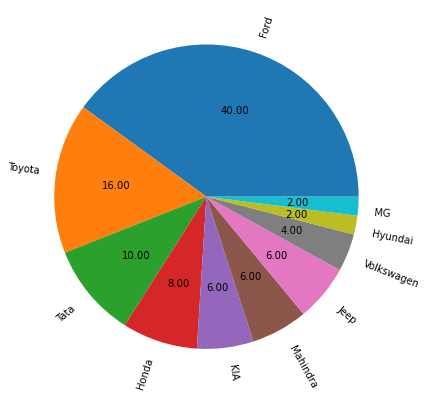

In [47]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest_price['Brand'].unique()
plt.pie(x=highest_price['Brand'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**From above plots we can see that around 40% of cars which are there in top 50 highest priced cars are from brand Ford.**

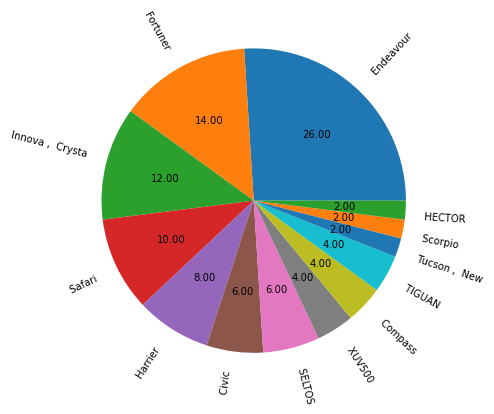

In [48]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest_price['Model'].unique()
plt.pie(x=highest_price['Model'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**From above plots we can see that around 26% of cars which are there in top 50 highest priced cars is of model Endeavour.**

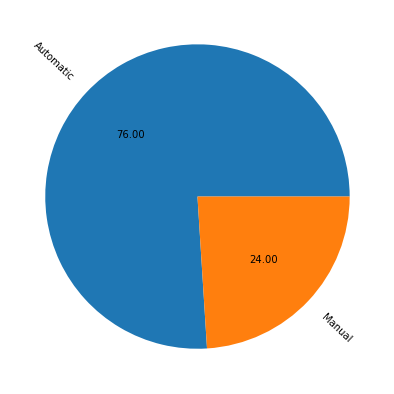

In [50]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest_price['Transmission'].unique()
plt.pie(x=highest_price['Transmission'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**From above plots we can see that around 76% of cars which are there in top 50 highest priced cars have Automatic gear type.**

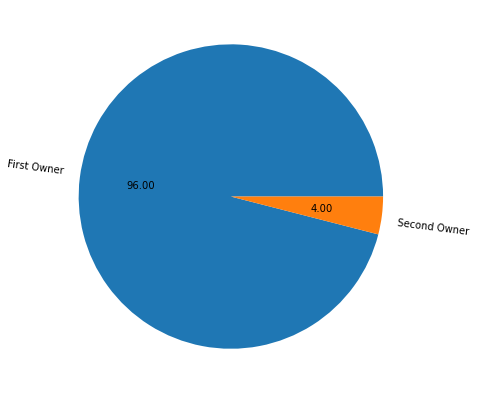

In [51]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest_price['Owners'].unique()
plt.pie(x=highest_price['Owners'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**From above plots we can see that around 96% of cars which are there in top 50 highest priced cars have single owner.**

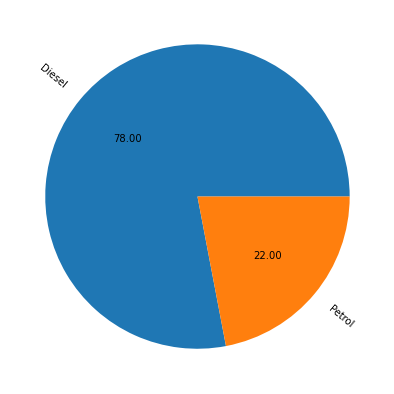

In [52]:
#plotting pie plot
plt.figure(figsize=(10,7))
labels=highest_price['Fuel_type'].unique()
plt.pie(x=highest_price['Fuel_type'].value_counts(),labels=labels,autopct='%.2f',rotatelabels=True)
plt.show()

**From above plots we can see that around 78% of cars which are there in top 50 highest priced cars have fuel type diesel.**

In [46]:
data.head()

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,Maruti,Swift,2020,Manual,22826,First Owner,Petrol,New Delhi,522000
1,KIA,SELTOS,2020,Manual,5999,First Owner,Petrol,New Delhi,1722000
2,Maruti,Swift,2020,Manual,16691,Second Owner,Petrol,New Delhi,530000
3,KIA,SELTOS,2020,Automatic,9417,First Owner,Petrol,New Delhi,1681000
4,Hyundai,"Grand , i10",2019,Manual,19964,First Owner,Petrol,New Delhi,503000


In [54]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [55]:
#Encoding column
lab_enc=LabelEncoder()

In [56]:
# Let's convert the categorical data to numerical data for test data
for i in cat_features:
    data[i]=lab_enc.fit_transform(data[i])

In [57]:
#checking
data.head(2)

,Brand,Model,Year,Transmission,Kms_driven,Owners,Fuel_type,Location,Price
0,10,79,2020,1,22826,0,3,6,522000
1,7,74,2020,1,5999,0,3,6,1722000


**So we can see that categorical columns data have been encoded.**

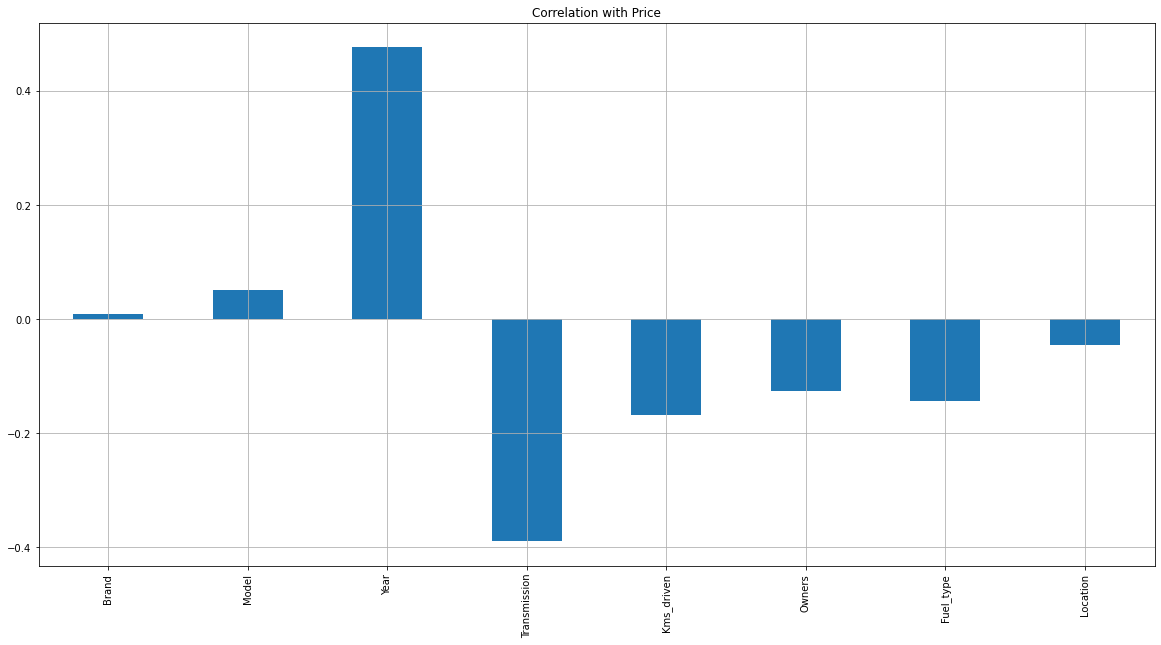

In [58]:
#Checking for correlation
data.drop(['Price'],axis=1).corrwith(data['Price']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Price')
plt.show()

**Observation**
* **In this we can see that column year is highly positively correlated to the label and column transmission is highly negatively correlated to the label and column brand is very is very least correlated to the label.**

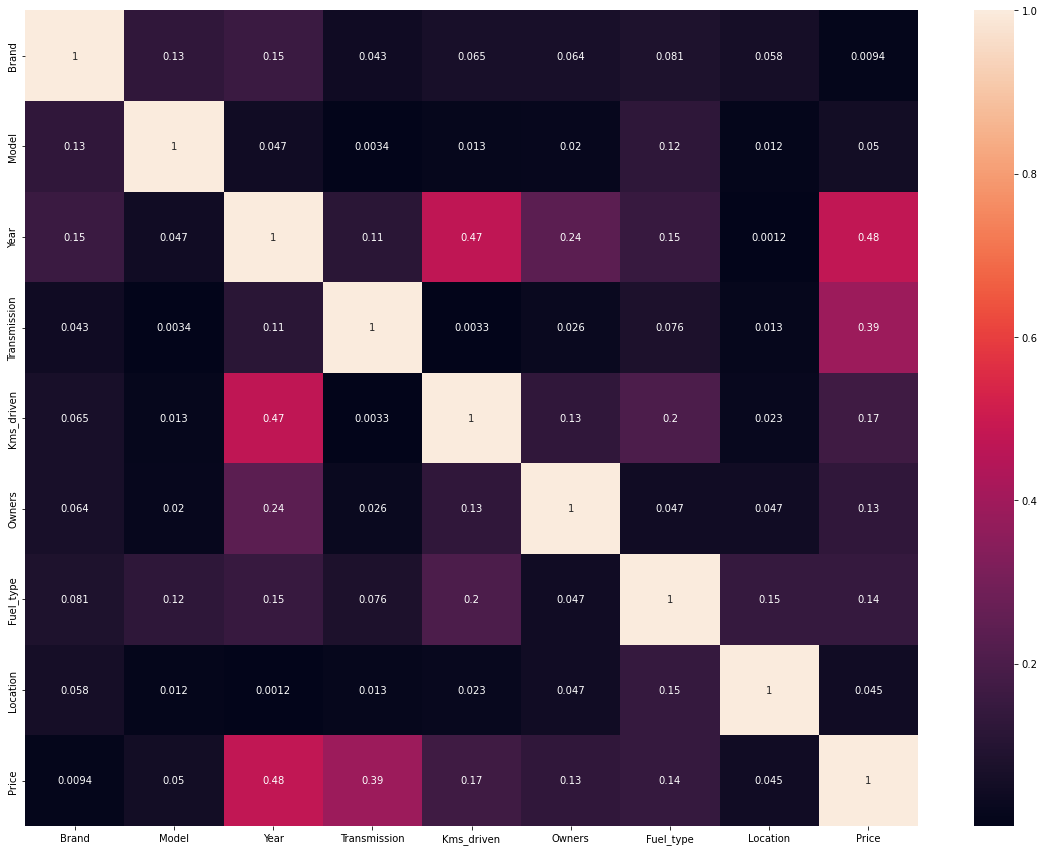

In [59]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

**Observation**

* **In this i am considering a percenatage of 75% between the features so that they are called as multicorrelated.**
* **so by looking at the heatmap there is not single value which is more than 75% which results in no multicollinearity within the features.**
* **But further i will cross verify it by using VIF method.**

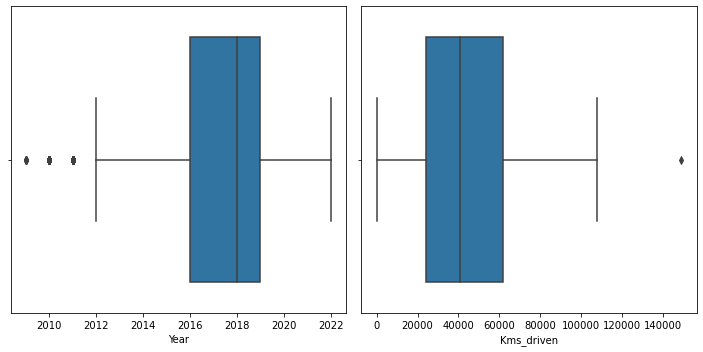

In [60]:
#Plotting bar plots
plt.figure(figsize=(10,5))
plotnumber=1
for column in cont_features:
    if plotnumber<=2:
        ax=plt.subplot(1,2,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

**We can see that outliers are present in both continiuous data columns that is in column year and kms driven column.**

In [61]:
#Importing required libraries
from scipy.stats import zscore

In [62]:
#Removing outliers
z_score=zscore(data[['Year','Kms_driven']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [63]:
data[z].shape

(5455, 9)

In [64]:
data.shape

(5463, 9)

In [65]:
#Percentage Loss of Data
data_loss=((5463-5455)/5463)*100
print(f'Data Loss:{data_loss} %')

Data Loss:0.14643968515467692 %


In [66]:
data=data[z]
data.shape

(5455, 9)

In [67]:
#checking skewness
data[cont_features].skew()

Year         -0.614590
Kms_driven    0.381581
Price         1.728368
dtype: float64

**We can see that skewness is present in column year. So by using power transform method i will treat the skewness.**

In [68]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [69]:
data[['Year']]=power_transform(data[['Year']],method='yeo-johnson')
data[['Year']]

,Year
0,0.980579
1,0.980579
2,0.980579
3,0.980579
4,0.575545
...,...
6028,1.818798
6029,1.394927
6031,0.575545
6032,1.394927


In [70]:
#checking skewness
data[cont_features].skew()

Year         -0.479179
Kms_driven    0.381581
Price         1.728368
dtype: float64

**So we can see that skewness have been treated.**

In [71]:
#Dividing dataset into features and label
#Features
x=data.drop(['Price'],axis=1)
#Label
y=data['Price']

In [72]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 0.41040168,  0.94645194,  0.9805792 , ..., -0.52566843,
         0.56848581,  1.04974897],
       [-0.40279888,  0.78869935,  0.9805792 , ..., -0.52566843,
         0.56848581,  1.04974897],
       [ 0.41040168,  0.94645194,  0.9805792 , ...,  1.75376025,
         0.56848581,  1.04974897],
       ...,
       [ 0.41040168, -1.19898334,  0.57554451, ..., -0.52566843,
         0.56848581,  1.51226254],
       [ 1.76573595,  1.19885609,  1.39492714, ..., -0.52566843,
         0.56848581,  1.51226254],
       [ 1.76573595,  0.34699209,  1.39492714, ..., -0.52566843,
         0.56848581,  1.51226254]])

In [73]:
x_scaler.shape

(5455, 8)

In [74]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.052781,Brand
1,1.040972,Model
2,1.552194,Year
3,1.035441,Transmission
4,1.470984,Kms_driven
5,1.066798,Owners
6,1.207969,Fuel_type
7,1.034946,Location


**So we can see that there is not a single value which is more than 5. So we can say that there are no multicollinearity between the features.**

# Since there are less columns so not using feature selection method

In [100]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

**Xtreme Gradient Regressor**

In [77]:
xgb=xgb.XGBRegressor()

In [286]:
#using range fucntion to find the best random state using xgb regressor
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    xgb.fit(x_train,y_train)
    pred=xgb.predict(x_train)
    y_pred=xgb.predict(x_test)
    print(f'at random state {i}, training accuracy is {metrics.r2_score(y_train,pred)*100}')
    print(f'at random state {i}, testing accuracy is {metrics.r2_score(y_test,y_pred)*100}')
    print('\n')

at random state 0, training accuracy is 98.86848566389084
at random state 0, testing accuracy is 91.51259930400137


at random state 1, training accuracy is 98.83624449655363
at random state 1, testing accuracy is 92.167531169906


at random state 2, training accuracy is 98.64328745836569
at random state 2, testing accuracy is 93.76834504498758


at random state 3, training accuracy is 98.72352716530229
at random state 3, testing accuracy is 92.36125011681312


at random state 4, training accuracy is 98.81724293552985
at random state 4, testing accuracy is 88.45638087981231


at random state 5, training accuracy is 98.83021290960458
at random state 5, testing accuracy is 92.13428652885915


at random state 6, training accuracy is 98.78975141678981
at random state 6, testing accuracy is 93.77431763850595


at random state 7, training accuracy is 98.8540625024055
at random state 7, testing accuracy is 91.71256191436123


at random state 8, training accuracy is 98.84217235823964
at random

**Taking Random state as 149.**

In [78]:
#since random state  has highest testing score,so taking random state as 149
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=149)

In [79]:
#Training the Model
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [371]:
pred=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [372]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 98.84929815934103

 Testing Score: 94.49732052564546


In [291]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [292]:
#Checking cross validation score for xgb regressor
for j in range(2,6):
    cv_score=cross_val_score(xgb,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is {cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is 0.9044273442843995and accuracy for the testing is 0.9449732052564547


at cross fold 3 the cv score is 0.9049160353052571and accuracy for the testing is 0.9449732052564547


at cross fold 4 the cv score is 0.9084054670358213and accuracy for the testing is 0.9449732052564547


at cross fold 5 the cv score is 0.9079656846215315and accuracy for the testing is 0.9449732052564547




**taking cv=4**

In [293]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

48583.36346453446

In [294]:
#mean squared error
mean_squared_error(y_test,y_pred)

5569222494.054324

In [295]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

74627.22354512678

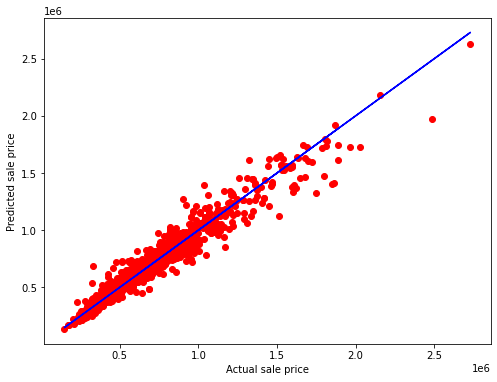

In [296]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual sale price',fontsize=10)
plt.ylabel('Predicted sale price',fontsize=10)
plt.show()

**Gradient Boosting**

In [80]:
#Instantiating Gradient Boosting
gb=GradientBoostingRegressor()

In [81]:
#since random state  has highest testing score,so taking random state as 149
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=149)

In [82]:
#Training the Model
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [300]:
pred=gb.predict(x_train)
y_pred=gb.predict(x_test)

In [301]:
#Printing Training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 84.73012129348727

 Testing score: 85.20219512805292


In [302]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [303]:
#Checking cross validation score for gradient boosting
cv_score=cross_val_score(gb,x_scaler,y,cv=4).mean()
cv_score

0.8156992313748674

In [304]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

81681.88410727576

In [305]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

14976752351.206367

In [306]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

122379.54220868113

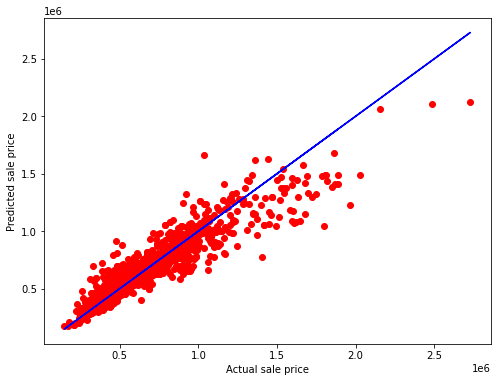

In [307]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual sale price',fontsize=10)
plt.ylabel('Predicted sale price',fontsize=10)
plt.show()

**Ada Boost**

In [83]:
#Instantiating Ada Boost Regressor
ada=AdaBoostRegressor()

In [84]:
#since random state  has highest testing score,so taking random state as 149
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=149)

In [85]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [311]:
pred=ada.predict(x_train)
y_pred=ada.predict(x_test)

In [312]:
#Printing Training and Testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 36.623427615601

 Testing Score: 32.996394978392495


In [313]:
train_accuracy=metrics.r2_score(y_train,pred)
test_accuracy=metrics.r2_score(y_test,y_pred)

In [314]:
#Checking cross validation score for Ada boost
cv_score=cross_val_score(ada,x_scaler,y,cv=4).mean()
cv_score

0.32473999620989863

In [315]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

224833.21533175858

In [316]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

67813868863.01226

In [317]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

260410.96148782267

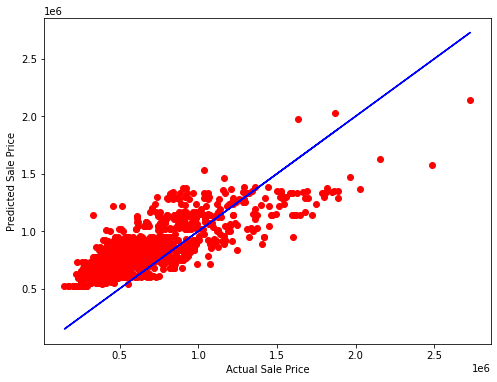

In [318]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Sale Price',fontsize=10)
plt.ylabel('Predicted Sale Price',fontsize=10)
plt.show()

**Random Forest Regressor**

In [86]:
#Instantiating Random forest regressor
rf=RandomForestRegressor()

In [87]:
#since random state  has highest testing score,so taking random state as 149
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=149)

In [88]:
#Training data
rf.fit(x_train,y_train)

RandomForestRegressor()

In [322]:
pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [323]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 98.61807305500776

 Testing Score: 91.81510279297117


In [324]:
#Checking cross validation score for Random forest
cv_score=cross_val_score(rf,x_scaler,y,cv=4).mean()
cv_score

0.8820331869500948

In [325]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

51404.231549364624

In [326]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

8283875855.272178

In [327]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

91015.80003094066

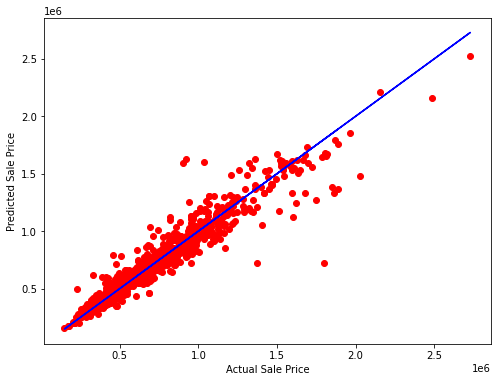

In [328]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Sale Price',fontsize=10)
plt.ylabel('Predicted Sale Price',fontsize=10)
plt.show()

**Decision Tree Regressor**

In [89]:
#Instantiating Decision Tree regressor
dt=DecisionTreeRegressor()

In [90]:
#since random state  has highest testing score,so taking random state as 149
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=149)

In [91]:
#Training data
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [332]:
pred=dt.predict(x_train)
y_pred=dt.predict(x_test)

In [333]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 99.9999971547329

 Testing Score: 83.7904206768837


In [334]:
#Checking cross validation score for Random forest
cv_score=cross_val_score(dt,x_scaler,y,cv=4).mean()
cv_score

0.8004509433374896

In [335]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

59628.2991202346

In [336]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

16405599164.222874

In [337]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

128084.34394656855

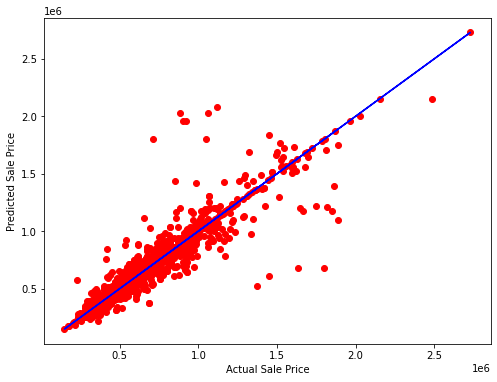

In [338]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Sale Price',fontsize=10)
plt.ylabel('Predicted Sale Price',fontsize=10)
plt.show()

**KNeighbors Regressors**

In [92]:
#Instantiating KNeighbors regressor
knn=KNeighborsRegressor()

In [93]:
#since random state  has highest testing score,so taking random state as 149
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=149)

In [94]:
#Training data
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [344]:
pred=knn.predict(x_train)
y_pred=knn.predict(x_test)

In [345]:
#Printing Training and Testing Score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 76.08092872753636

 Testing Score: 65.77767550005349


In [346]:
#Checking cross validation score for Random forest
cv_score=cross_val_score(knn,x_scaler,y,cv=4).mean()
cv_score

0.5780473416547444

In [347]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

126813.00586510263

In [348]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

34636169577.41936

In [349]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

186107.95140836772

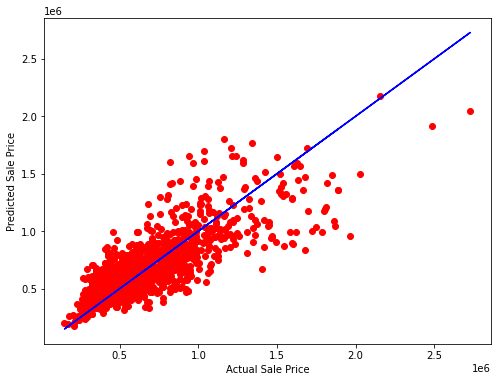

In [350]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Sale Price',fontsize=10)
plt.ylabel('Predicted Sale Price',fontsize=10)
plt.show()

In [351]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['XGBoost','Gradient Boosting','Ada Boost','Random Forest','Decision Tree','KNeighbors'],
    'Training Score':[98.84,84.73,36.62,98.61,99.99,76.08],
    'Testing Score':[94.49,85.20,32.99,91.85,83.79,65.77],
    'Cros val score':[90.84,81.56,32.47,88.20,80.04,84.80],
    'RMSE':[74627.22,122379.54,260410.96,91015.80,128084.34,181607.95]
})
data

,Models,Training Score,Testing Score,Cros val score,RMSE
0,XGBoost,98.84,94.49,90.84,74627.22
1,Gradient Boosting,84.73,85.20,81.56,122379.54
2,Ada Boost,36.62,32.99,32.47,260410.96
3,Random Forest,98.61,91.85,88.20,91015.80
4,Decision Tree,99.99,83.79,80.04,128084.34
5,KNeighbors,76.08,65.77,84.80,181607.95


**Observation**
* **By looking at the above dataframe we can see that Decision tree have seen most of the data followed  by XGBoost.**
* **But the testing score and cross validation score of XGBoost is the higest compared to other algorithms.**
* **Root Mean squared error of XGBoost is less comapared to others. So i am going forward with XGBoost.**

In [95]:
#Using Grid Search cv for hyperparameter tuning for XGB
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid=({
    'n_estimators': [100,200],
    'max_depth' : [2,3,4],
    'eta':[0.3,0.1,0.01],
    'subsample':[0.1,0.2,0.3],
    'colsample_bytree' :[0.4,0.5,0.6]
})

In [97]:
grid_search=GridSearchCV(xgb,param_grid=param_grid,cv=4)

In [98]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...ot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'eta': [0.3, 0.1, 0.01], 'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200],
                         'subsample': [0.1, 0.2, 0.3]})

In [356]:
#best Parameters
grid_search.best_params_ 

{'colsample_bytree': 0.5,
 'eta': 0.3,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.3}

In [101]:
#Training with the best parameters
xgb1=xgb.XGBRegressor(colsample_bytree=0.5,eta=0.3,max_depth=4,n_estimators=200,subsample=0.3)
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [360]:
#Printing the training and testing score
print('\n Training Score:',metrics.r2_score(y_train,pred)*100)
print('\n Testing Score:',metrics.r2_score(y_test,y_pred)*100)


 Training Score: 76.08092872753636

 Testing Score: 65.77767550005349


In [361]:
#Checking cross validation score for XGBoost
cv_score=cross_val_score(xgb1,x_scaler,y,cv=4).mean()
cv_score

0.8906976688802899

In [362]:
#Mean Absolute Error
mean_absolute_error(y_test,y_pred)

126813.00586510263

In [363]:
#Mean Squared Error
mean_squared_error(y_test,y_pred)

34636169577.41936

In [364]:
#Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

186107.95140836772

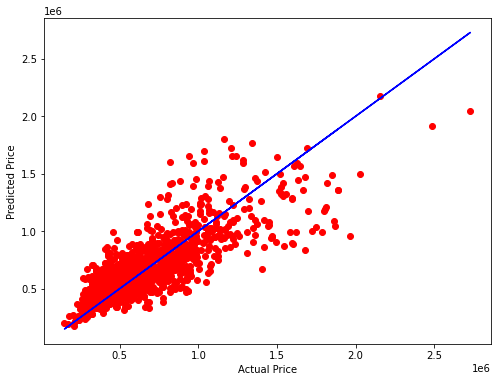

In [365]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Price',fontsize=10)
plt.ylabel('Predicted Price',fontsize=10)
plt.show()

**Observation**
* **So we can see that after doing hyper parameter tuning on our best  model, the training, tetsing, cross validation score decreased and Root mean square error increased.Hence i am saving the model on which hyper parameter tuning was not done.**

In [373]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(xgb,open('Car Price Prediction Project','wb'))

In [374]:
#Loading the saved model
model=pickle.load(open('Car Price Prediction Project','rb'))

In [375]:
#Prediction
prediction=model.predict(x_test)
prediction

array([ 636453.6 , 1726238.9 ,  488433.38, ...,  423070.4 ,  555018.1 ,
       1743999.6 ], dtype=float32)

In [376]:
#This are the predicted prices of the flight tickets
Predicted_car_Price=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
Predicted_car_Price

,0,1,2,3,4,5,6,7,8,9,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
Predicted,636453.625,1726238.875,488433.375,718083.3125,336820.96875,686304.75,575406.8125,385789.625,1396313.0,214457.59375,...,649380.1875,752326.0625,455142.625,623794.1875,454219.65625,1567463.125,706488.625,423070.40625,555018.125,1743999.625
Actual,604000.000,1963000.000,487000.000,593000.0000,396000.00000,688000.00,496000.0000,404000.000,1607000.0,218000.00000,...,539000.0000,853000.0000,399000.000,577000.0000,469000.00000,1524000.000,705000.000,416000.00000,604000.000,1888000.000


**Using regression model, we have got the predicted price of the car.From the above output we can observe that predicted values are almost near to the actual values.**

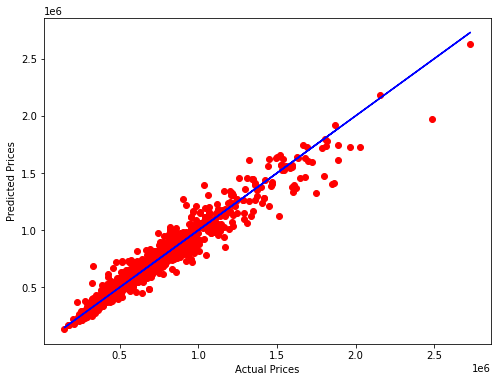

In [377]:
#Plotting the best fit line
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Prices',fontsize=10)
plt.ylabel('Predicted Prices',fontsize=10)
plt.show()